## Eigendecomposition
Before moving on to principal component analysis, we should take a quick gander at eigendecomposition and its generalization to non-square matrices, as it will make things much easier to understand from a linear algebra perspective.

All *normal* matrices $\mathbf A$, which means they satisfy the identity $\mathbf A\mathbf A^T = \mathbf A^T\mathbf A$, can be eigendecomposed. This includes orthogonal, symmetric, and skew-symmetric matrices. The physical interpretation is that every such matrix can be thought of as a combination of a rotation and stretching, sometimes also a reflection (when the determinant is negative). See for example what the matrix $\mathbf A = \begin{bmatrix} 1.5 & 0.5 \\ 0.5 & 1.0 \end{bmatrix}$ does to a square:

Is A normal? Yes.


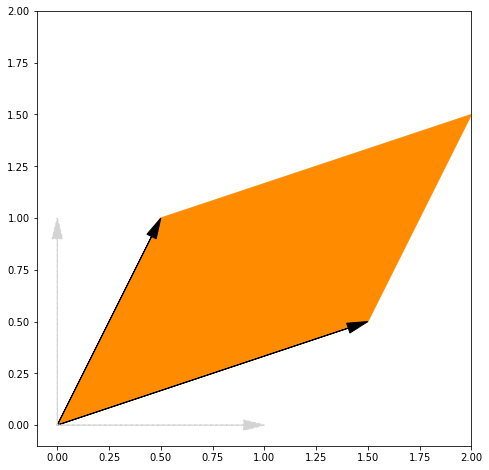

In [1]:
import numpy as np
import matplotlib.patches as patches
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, aspect='equal')
ax.set_xlim(-0.1, 2.0)
ax.set_ylim(-0.1, 2.0)

# vectors 
e1 = np.array([0.0, 1.0])
e2 = np.array([1.0, 0.0])
origin = np.array([0, 0])

# matrix is defined here
A = np.array([[1.5, 0.5],
              [0.5, 1.0]])

print("Is A normal?", "Yes." if np.all(A.T @ A == A @ A.T) else "No")

# matrix applied to starting vectors
v1 = A @ e1
v2 = A @ e2

# we need the coordinates of the endpoints
ax.add_patch(patches.Polygon(xy=[origin, v1, v1+v2, v2], color="darkorange"))

ax.arrow(*origin, *(v1), head_width=0.05, head_length=0.1, \
         fc='k', ec='k', length_includes_head=True) 
ax.arrow(*origin, *(v2), head_width=0.05, head_length=0.1, \
         fc='k', ec='k', length_includes_head=True)

ax.arrow(*origin, *e1, head_width=0.05, head_length=0.1, \
         fc='lightgray', ec='lightgray', ls='--', length_includes_head=True)
ax.arrow(*origin, *e2, head_width=0.05, head_length=0.1, \
         fc='lightgray', ec='lightgray', ls='--', length_includes_head=True)


plt.show()

Feel free to try different matrices and see how changing components changes the resulting shape.

**Eigenvectors** are vectors that only get *stretched* under the action of a matrix. The factor $\lambda$ by which that eigenvector is stretched is called its corresponding **eigenvalue**:

\begin{equation*} 
  \mathbf A\mathbf v = \lambda \mathbf v
\end{equation*}

So after applying the matrix, the resulting vector is *colinear* to the original vector.

The eigenvectors of a matrix span an orthogonal system, in which the matrix $\mathbf A$ is *diagonal* (often denoted as $\mathbf D$). The eigenvector matrix $\mathbf V = \left[\mathbf v_1 \mathbf v_2 \dots \mathbf v_n\right]$, containing all eigenvectors $\mathbf v_i$ in its columns, can be used to express this mathematically:

\begin{equation*} 
  \mathbf D = \mathbf V^{-1}\mathbf A\mathbf V 
\end{equation*}

or, equivalently:

\begin{equation*} 
  \mathbf A = \mathbf V\mathbf D\mathbf V^{-1}
\end{equation*}

The diagonal matrix $\mathbf D$ now contains all the eigenvalues of $\mathbf A$. What happens if we apply this decomposed form sequentially to a vector? Let's try this with a more complicated matrix:

Eigenvalues: 
 [1.80901699 0.69098301]
Eigenvectors: 
 [[ 0.85065081 -0.52573111]
 [ 0.52573111  0.85065081]]


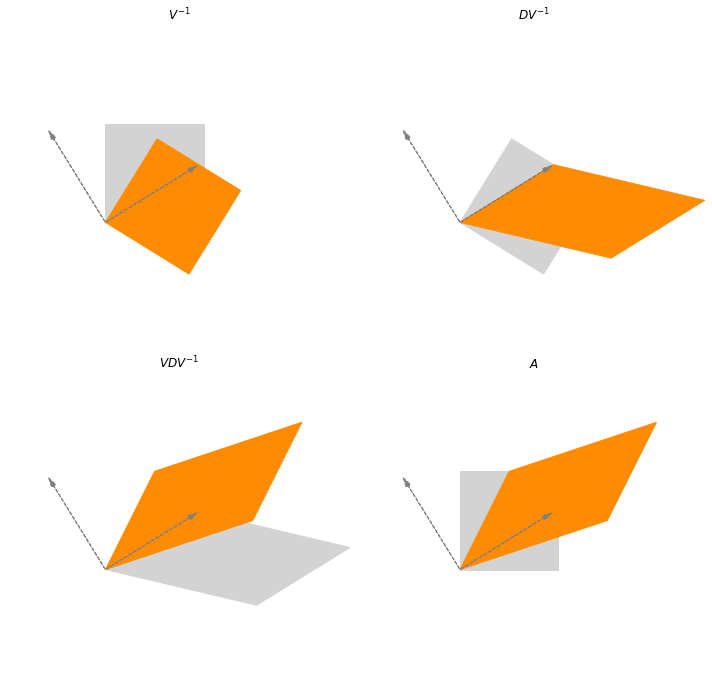

In [8]:
fig, axes = plt.subplots(2, 2, figsize=(10,10))
axes = axes.flatten()

titles = [r"$V^{-1}$", 
          r"$ D V^{-1}$", 
          r"$ V D V^{-1}$", 
          r"$A$"]

for i,ax in enumerate(axes):
    ax.set_aspect('equal')
    ax.set_xlim(-1.0, 2.5)
    ax.set_ylim(-1.0, 2.0)
    ax.set_title(label=titles[i])
    

# vectors 
e1 = np.array([0.0, 1.0])
e2 = np.array([1.0, 0.0])
origin = np.array([0.0, 0.0])

# try different matrices to see their effects
# diagonal matrices don't rotate, they only stretch, the stretch factors are the eigenvalues
#A = np.array([[1.9, 0.0],
#              [0.0, 1.4]])

# rotation matrices do not stretch, they only rotate
# since the eigenvalues are imaginary here, the rotation
# happens in dimensions we do not plot here, hence we only see
# a line where perpendicular vectors should be
#α = np.pi / 2.0
#A = np.array([[np.cos(α), np.sin(α)],
#              [-np.sin(α), np.cos(α)]])

# combining both
A = np.array([[1.5, 0.5],
              [0.5, 1]])


# this saves eigenvalues into λ and normalized eigenvectors as ROWS into V
λ, V = np.linalg.eig(A)

# since we need the eigenvectors in the COLUMNS:
#V = V.T

V_inv = np.linalg.inv(V)
D = np.diag(λ)

print("Eigenvalues: \n", λ)
print("Eigenvectors: \n", V)

# plot original square
axes[0].add_patch(patches.Polygon(xy=[origin, e1, e1+e2, e2], color="lightgray"))

# apply first rotation
v1 = V_inv @ e1
v2 = V_inv @ e2
axes[0].add_patch(patches.Polygon(xy=[origin, v1, v1+v2, v2], color="darkorange"))

# apply stretch
axes[1].add_patch(patches.Polygon(xy=[origin, v1, v1+v2, v2], color="lightgray"))
v1 = D @ v1
v2 = D @ v2
axes[1].add_patch(patches.Polygon(xy=[origin, v1, v1+v2, v2], color="darkorange"))

# apply second rotation
axes[2].add_patch(patches.Polygon(xy=[origin, v1, v1+v2, v2], color="lightgray"))
v1 = V @ v1
v2 = V @ v2
axes[2].add_patch(patches.Polygon(xy=[origin, v1, v1+v2, v2], color="darkorange"))

# compare to action of original matrix
axes[3].add_patch(patches.Polygon(xy=[origin, e1, e1+e2, e2], color="lightgray"))
v1 = A @ e1
v2 = A @ e2
axes[3].add_patch(patches.Polygon(xy=[origin, v1, v1+v2, v2], color="darkorange"))

# plot eigenvectors everywhere
for ax in axes:
    ax.arrow(*origin, *V[:,0], head_width=0.05, head_length=0.1, fc='gray', ec='gray', ls='--')
    ax.arrow(*origin, *V[:,1], head_width=0.05, head_length=0.1, fc='gray', ec='gray', ls='--')
    ax.axis("off")


plt.tight_layout()
plt.show()



So indeed, the vectors are first rotated by this decomposition, then stretched along the original coordinate axes, then rotated back.

Real symmetric matrices have real eigenvalues and eigenvectors. In case $\mathbf A$ is symmetric, the eigenvector matrix $\mathbf V$ satisfies $\mathbf V^T = \mathbf V^{-1}$, so $\mathbf V$ is orthogonal and hence, a **rotation matrix**. In this case, $\mathbf V$ is sometimes denoted $\mathbf Q$ or $\mathbf R$.

The eigendecomposition of a matrix might not be unique. An example of a matrix without a unique eigendecomposition is the identity matrix. The reason is that every vector is an eigenvector of the identity matrix, such that $\mathbf V$ is arbitrary.

If we take the eigendecomposition and explicitly write down each term vectorwise (recall that matrix multiplication multilies the rows of the first matrix with the columns of the second matrix) we get

\begin{align*}
  A &= \lambda_1 v_1 v_1^\text{T} + \lambda_2 v_2 v_2^\text{T} + \cdots \\
    &= \lambda_1 \begin{bmatrix} \rule[-1ex]{0.5pt}{2.5ex} \\ v_1 \\ \rule[-1ex]{0.5pt}{2.5ex} \end{bmatrix} \begin{matrix}\begin{bmatrix} -- & v_1 & -- \end{bmatrix} \\ \mbox{} \\ \mbox{}\end{matrix} + 
    \lambda_2 \begin{bmatrix} \rule[-1ex]{0.5pt}{2.5ex} \\ v_2 \\ \rule[-1ex]{0.5pt}{2.5ex} \end{bmatrix} \begin{matrix}\begin{bmatrix} -- & v_2 & -- \end{bmatrix} \\ \mbox{} \\ \mbox{}\end{matrix} + \cdots \\
    &= \sum_i \lambda_i v_i v_i^\text{T}
\end{align*}

which is one formulation of the **spectral theorem**, found in virtually all areas of research, especially numerical analysis.